In [6]:
# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# EDA

In [8]:
# 2. LOAD DATASET

df = pd.read_csv('Dataset.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [9]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [10]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,springer,2012,12,23,No,1,?,Clear,0.26,0.2727,0.65,0.1343,12,37,49


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [17]:
df.dtypes

instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

In [19]:
df.shape

(17379, 17)

In [21]:
df.describe()

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


In [23]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
df.replace('?', np.nan, inplace=True)

In [29]:
df.fillna(method='ffill', inplace= True)
df.fillna(method='bfill', inplace = True)

C:\Users\rajen\AppData\Local\Temp\ipykernel_9656\3527332409.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace= True)
C:\Users\rajen\AppData\Local\Temp\ipykernel_9656\3527332409.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace = True)


In [31]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

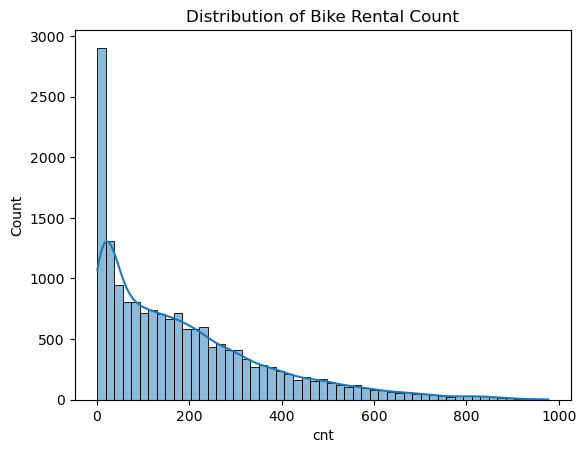

In [33]:
# Histogram

sns.histplot(df['cnt'], kde=True)
plt.title("Distribution of Bike Rental Count")
plt.show()

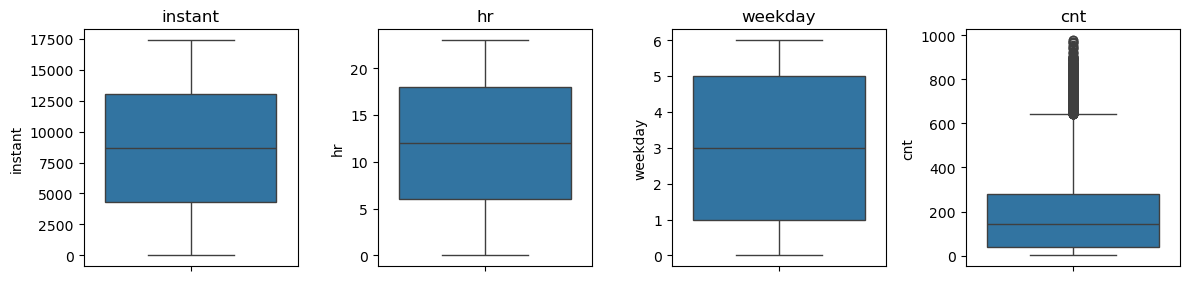

In [34]:
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

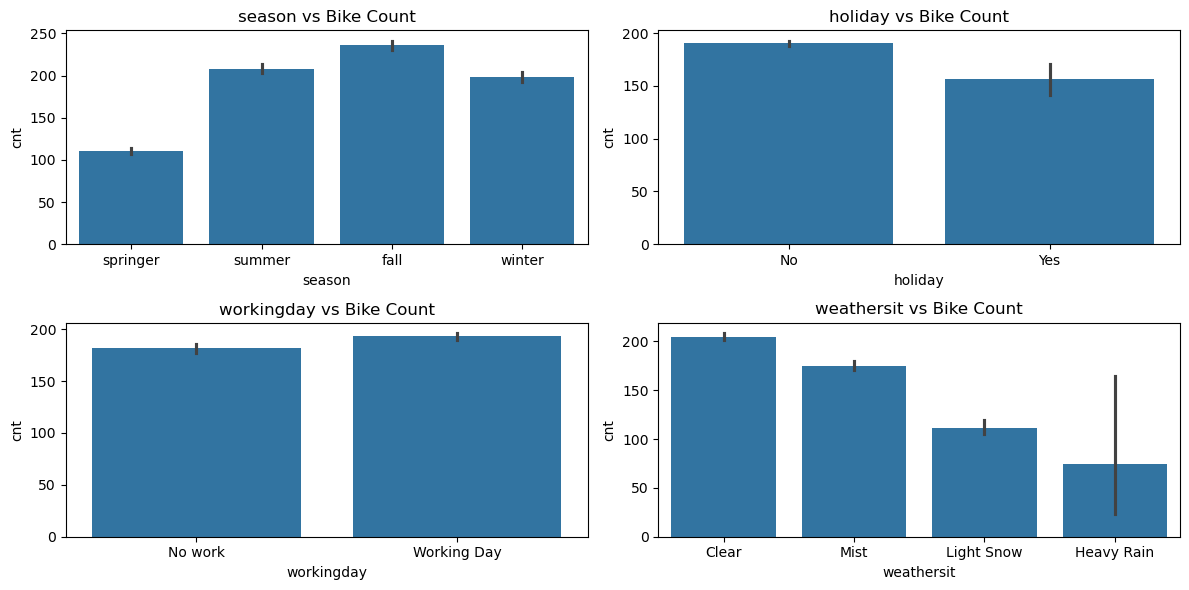

In [36]:
cat_cols = ['season', 'holiday', 'workingday', 'weathersit']

plt.figure(figsize=(12,6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=col, y='cnt', data=df)
    plt.title(f"{col} vs Bike Count")

plt.tight_layout()
plt.show()

In [37]:
# Clean column names
df.columns = df.columns.str.strip()

# Print columns to verify
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


# DATA VISUALIZATION

C:\Users\rajen\AppData\Local\Temp\ipykernel_9656\4107710163.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df, estimator='mean', marker='o', ci=None)


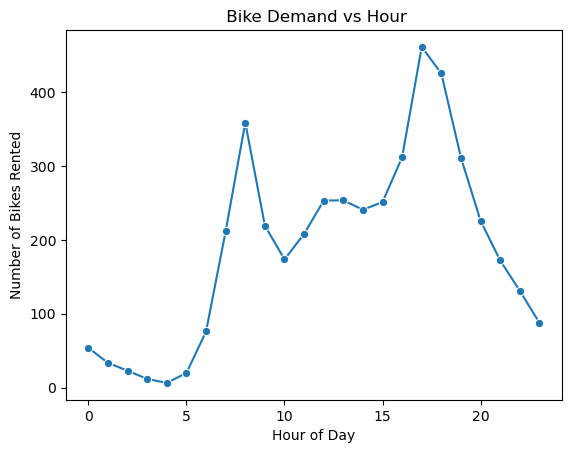

In [40]:
sns.lineplot(x='hr', y='cnt', data=df, estimator='mean', marker='o', ci=None)
plt.title(" Bike Demand vs Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bikes Rented")
plt.show()

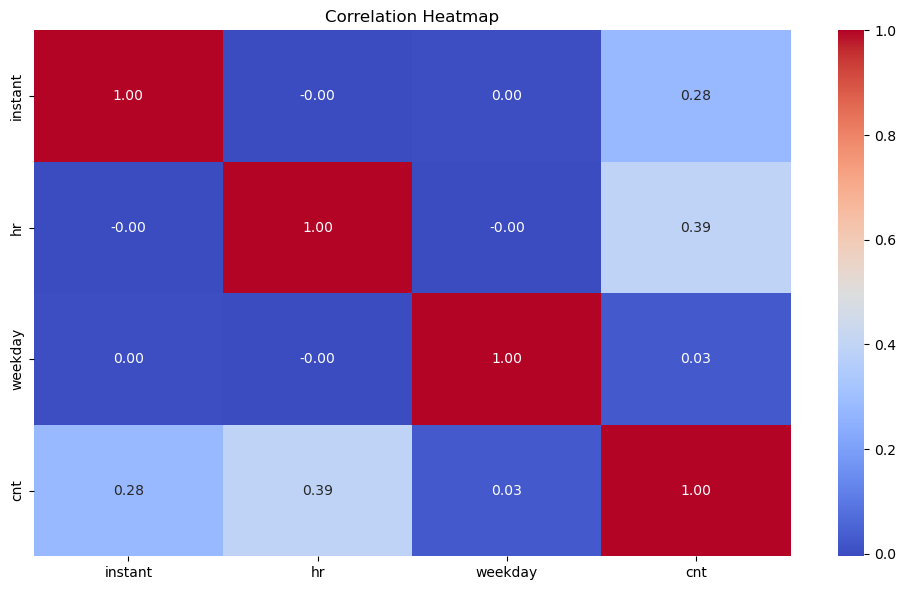

In [41]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Feature Enginerring

In [47]:
# Data Cleaning

num_cols = ['temp', 'atemp', 'hum', 'windspeed']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


# Feature Creation

df['is_peak_hour'] = df['hr'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)


# Categorical Encoding (SAFE)

cat_cols = [col for col in ['season', 'weathersit', 'weekday','workingday','holiday'] if col in df.columns]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


# Feature Scaling

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# Train-Test Split


X = df.drop(['cnt', 'dteday'], axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

 # MODEL BUILDING

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [52]:
df.dtypes

instant                     int64
dteday                     object
yr                         object
mnth                       object
hr                          int64
temp                      float64
atemp                     float64
hum                       float64
windspeed                 float64
casual                     object
registered                 object
cnt                         int64
is_peak_hour                int64
season_springer              bool
season_summer                bool
season_winter                bool
weathersit_Heavy Rain        bool
weathersit_Light Snow        bool
weathersit_Mist              bool
weekday_1                    bool
weekday_2                    bool
weekday_3                    bool
weekday_4                    bool
weekday_5                    bool
weekday_6                    bool
workingday_Working Day       bool
holiday_Yes                  bool
dtype: object

In [54]:
from sklearn.model_selection import train_test_split

# Feature & Target Split

X = df.drop(["cnt","dteday"], axis=1)  
y = df["cnt"]              

# Train-Test Split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [58]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
# Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

# HYPERPARAMETER TUNING

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [62]:
#Decision Tree – Grid Search

In [63]:
dt_params = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10]
}

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_params,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_

print("Best Decision Tree Parameters:", dt_grid.best_params_)

Best Decision Tree Parameters: {'max_depth': 20, 'min_samples_split': 5}


In [64]:
# Random Forest – Grid Search

In [65]:
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_

print("Best Random Forest Parameters:", rf_grid.best_params_)

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [66]:
#Gradient Boosting – Grid Search

In [67]:
gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

gb_grid.fit(X_train, y_train)

best_gb = gb_grid.best_estimator_

print("Best Gradient Boosting Parameters:", gb_grid.best_params_)

Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}


# MODEL EVALUATION

In [74]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [77]:
from xgboost import XGBRegressor


In [83]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

In [99]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [101]:
y_pred_lr = lr_model.predict(X_test)



In [103]:
def evaluate_model(y_test, y_pred, name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Performance")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)

    return [name, mae, mse, rmse, r2]


In [105]:
results = []

results.append(evaluate_model(y_test, y_pred_lr, "Linear Regression"))


results_df = pd.DataFrame(results, columns=["Model","MAE","MSE","RMSE","R2"])
print("\nModel Comparison Table")
print(results_df)



Linear Regression Performance
MAE: 0.007129820785431544
MSE: 8.481885784842076e-05
RMSE: 0.009209715405397756
R2: 0.9999999973214035

Model Comparison Table
               Model      MAE       MSE     RMSE   R2
0  Linear Regression  0.00713  0.000085  0.00921  1.0


In [107]:
best = results_df.sort_values(by="R2", ascending=False).iloc[0]
print("\nBest Model is:", best["Model"])



Best Model is: Linear Regression


# MODEL DEPLOYMENT

In [112]:
import joblib

# suppose best model is XGBoost
joblib.dump(xgb_model, "best_model.pkl")

print("✅ Model saved successfully")


✅ Model saved successfully


In [114]:
model = joblib.load("best_model.pkl")


In [116]:
def predict_price(features):
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)
    return prediction[0]


In [118]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [124]:
# Save Model & Scaler (For Deployment)
import joblib

joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [126]:
import streamlit as st
import numpy as np
import joblib

# load model
model = joblib.load("best_model.pkl")

st.title("🚲 Bike Rental Prediction App")

st.write("Enter details to predict rentals")

# example inputs (change according to dataset)
temp = st.number_input("Temperature")
humidity = st.number_input("Humidity")
windspeed = st.number_input("Windspeed")

if st.button("Predict"):
    features = np.array([[temp, humidity, windspeed]])
    prediction = model.predict(features)

    st.success(f"Predicted Rentals: {prediction[0]}")
